In [1]:
## Import libraries
import os, cv2, random
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import ticker
import seaborn as sns
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops, local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import zipfile
import io

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
## Import images 5males and 5 females
male1=cv2.imread("/content/male1.jpg")
male2=cv2.imread("/content/male2.jpg")
male3=cv2.imread("/content/male3.jpg")
male4= cv2.imread("/content/male4.jpg")
male5=cv2.imread("/content/male5.jpg")
female1=cv2.imread("/content/female1.jpg")
female2=cv2.imread("/content/female2.jpg")
female3=cv2.imread("/content/female3.jpg")
female4=cv2.imread("/content/female4.jpg")
female5=cv2.imread("/content/female5.jpg")

In [3]:
#3 Create separate list for male and female
male_list= [male1, male2, male3, male4, male5]
female_list=[female1, female2, female3, female4, female5]

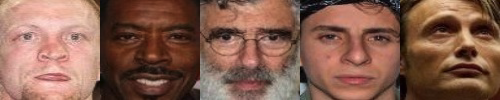

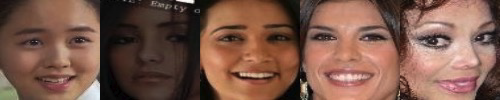

In [4]:
##Resized the images to 100,100
male_resized=[]
female_resized=[]
for i in male_list:
  i=cv2.resize(i,(100,100))
  male_resized.append(i)
images = cv2.hconcat(male_resized)
cv2_imshow(images)

for i in female_list:
  i=cv2.resize(i,(100,100))
  female_resized.append(i)
image = cv2.hconcat(female_resized)
cv2_imshow(image)


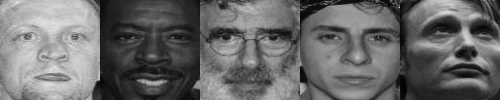

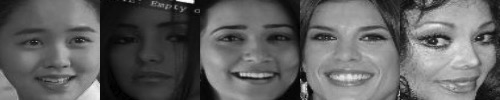

In [5]:
## Convert to gray scale
gray_male=[]
gray_female=[]
def convert_to_gray(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

for i in male_resized:
  x=convert_to_gray(i)
  gray_male.append(x)
for i in female_resized:
  y=convert_to_gray(i)
  gray_female.append(y)

gray_male_images= cv2.hconcat(gray_male)
cv2_imshow(gray_male_images)

gray_female_images= cv2.hconcat(gray_female)
cv2_imshow(gray_female_images)


### Image Enhencement

In [6]:
##Image enhancement with histogram based model
def histogram_equalization(image):
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Calculate the CDF
    cdf = hist.cumsum()

    # Normalize the CDF
    nor_cdf = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

    # Map the image using normalized CDF
    equalized = nor_cdf[image]

    # Convert the equalized image to uint8 data type
    equalized_image = equalized.astype(np.uint8)

    return equalized_image

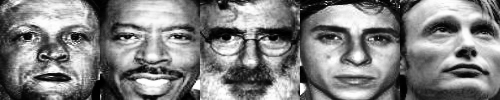

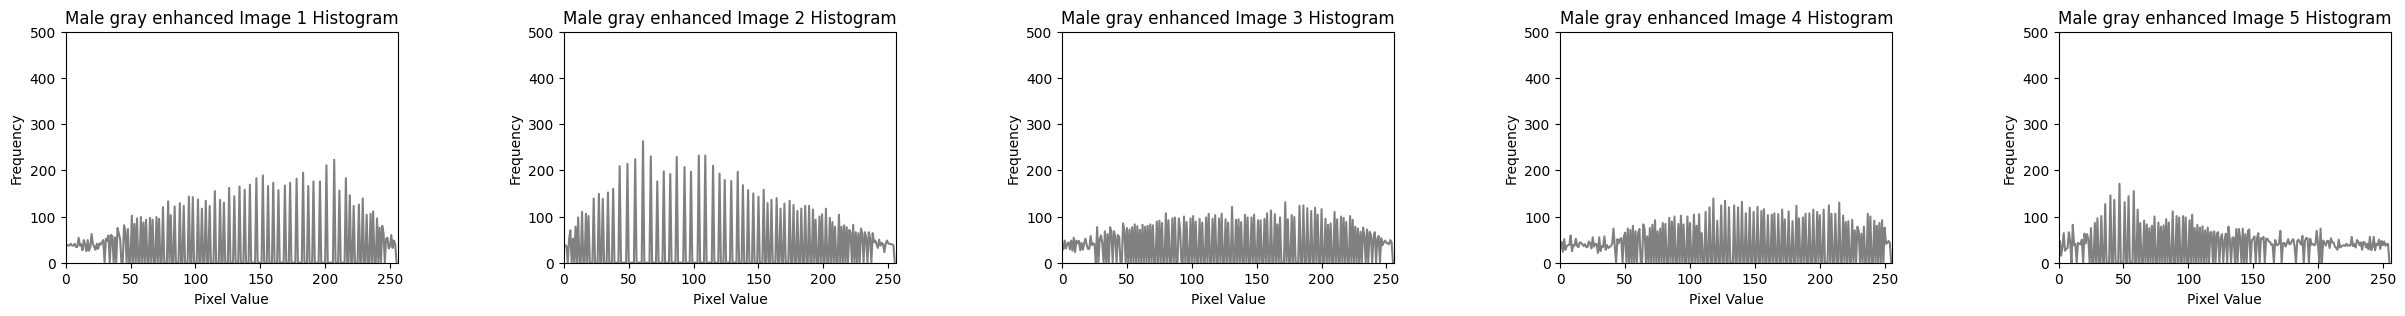

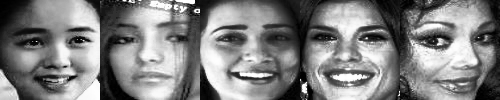

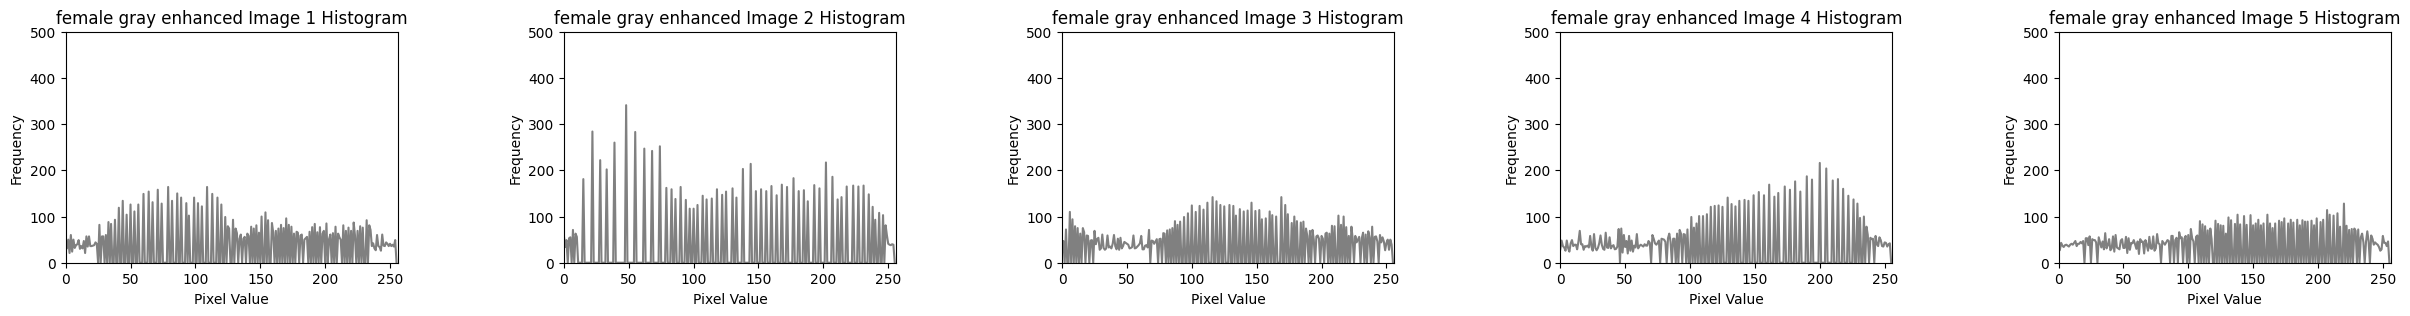

In [7]:
## Applying the function to store values in the list and plot the images and  histogram
male_hist=[]
female_hist=[]
for i in gray_male:
  male_eq= histogram_equalization(i)
  male_hist.append(male_eq)


for i in gray_female:
  female_eq= histogram_equalization(i)
  female_hist.append(female_eq)


concatenated_male_images = cv2.hconcat(male_hist)
cv2_imshow(concatenated_male_images)
plt.figure(figsize=(30, 3))

# Iterate through each histogram in male_hist and plot horizontally
for i, hist in enumerate(male_hist):
    plt.subplot(1, len(male_hist), i+1)
    plt.subplots_adjust(wspace=0.5)

    # Calculate histogram
    hist_data = cv2.calcHist([hist], [0], None, [256], [0, 256])

    # Plot histogram
    plt.plot(hist_data, color='gray')
    plt.xlim([0, 256])
    plt.ylim([0, 500])
    plt.title(f'Male gray enhanced Image {i+1} Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.show()


concatenated_female_images = cv2.hconcat(female_hist)
cv2_imshow(concatenated_female_images)
# Iterate through each histogram in male_hist and plot horizontally
plt.figure(figsize=(30, 3))
for i, hist in enumerate(female_hist):
    plt.subplot(1, len(male_hist), i+1)
    plt.subplots_adjust(wspace=0.5)

    # Calculate histogram
    hist_data = cv2.calcHist([hist], [0], None, [256], [0, 256])

    # Plot histogram
    plt.plot(hist_data, color='gray')
    plt.xlim([0, 256])
    plt.ylim([0, 500])
    plt.title(f'female gray enhanced Image {i+1} Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.show()


### Image Sharpening

In [8]:
def sharpen_gray_image(gray_image):
    # Create a sharpening kernel
    kernel = np.array([[-0.5,-.50,-.50],
                       [-.5, 5,-.5],
                       [-.5,-.5,-.5]])

    # Apply the sharpening kernel to the image using filter2D
    sharpened_image = cv2.filter2D(gray_image, -1, kernel)

    return sharpened_image

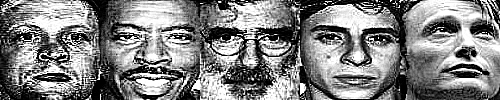

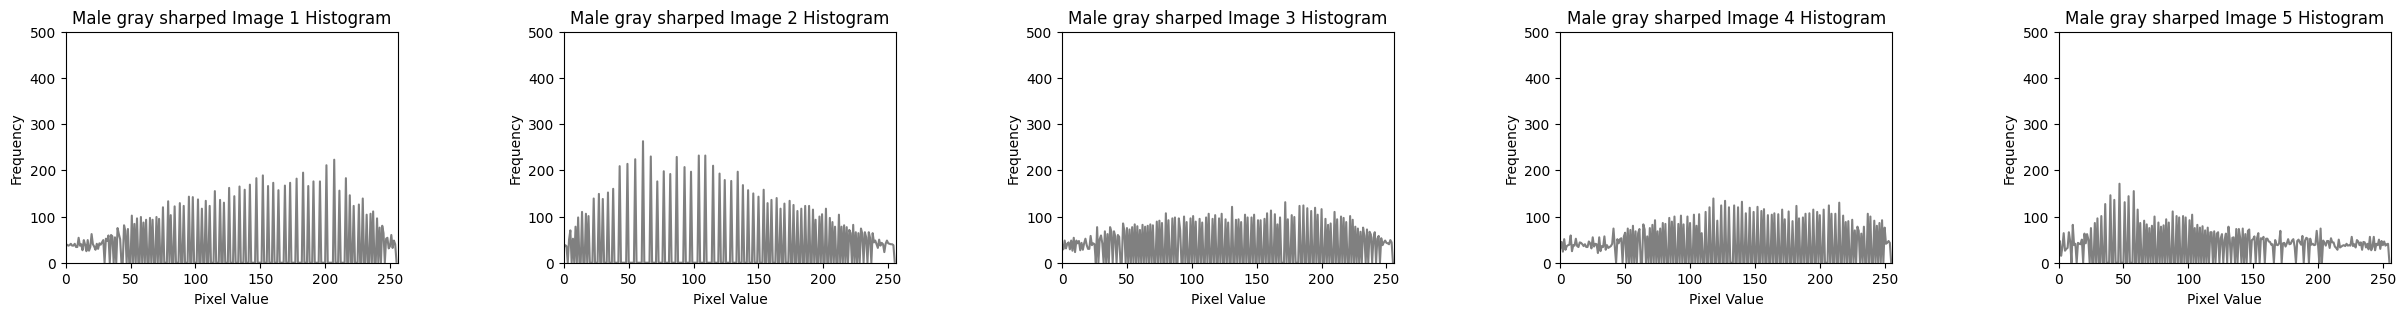

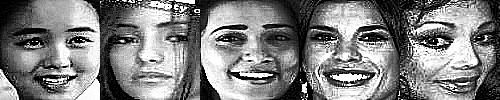

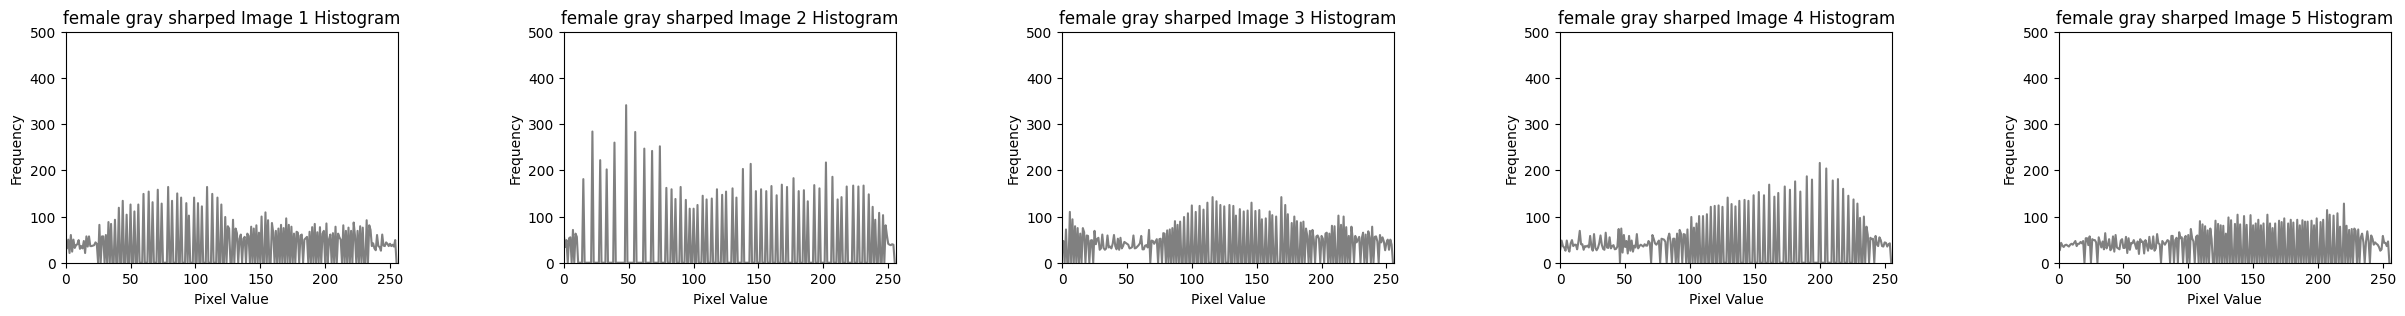

In [9]:
## Applying function and plotting images and histogram
male_sharpened=[]
female_sharpened=[]
for i in male_hist:
  male_sh= sharpen_gray_image(i)
  male_sharpened.append(male_sh)


for i in female_hist:
  female_sh= sharpen_gray_image(i)
  female_sharpened.append(female_sh)


concatenated_male_images = cv2.hconcat(male_sharpened)
cv2_imshow(concatenated_male_images)
plt.figure(figsize=(30, 3))

# Iterate through each histogram in male_hist and plot horizontally
for i, hist in enumerate(male_hist):
    plt.subplot(1, len(male_hist), i+1)
    plt.subplots_adjust(wspace=0.5)

    # Calculate histogram
    hist_data = cv2.calcHist([hist], [0], None, [256], [0, 256])

    # Plot histogram
    plt.plot(hist_data, color='gray')
    plt.xlim([0, 256])
    plt.ylim([0, 500])
    plt.title(f'Male gray sharped Image {i+1} Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.show()


concatenated_female_images = cv2.hconcat(female_sharpened)
cv2_imshow(concatenated_female_images)
# Iterate through each histogram in male_hist and plot horizontally
plt.figure(figsize=(30, 3))
for i, hist in enumerate(female_hist):
    plt.subplot(1, len(male_hist), i+1)
    plt.subplots_adjust(wspace=0.5)

    # Calculate histogram
    hist_data = cv2.calcHist([hist], [0], None, [256], [0, 256])

    # Plot histogram
    plt.plot(hist_data, color='gray')
    plt.xlim([0, 256])
    plt.ylim([0, 500])
    plt.title(f'female gray sharped Image {i+1} Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.show()

### Extract 5 features
1. Haralick
2.Box counting
3. Area
4. Chain Code
5.lbp


In [10]:
## Applying haralick, box and area together
def extract_haralick(image):
    texture_props = ['contrast', 'homogeneity', 'energy', 'correlation']
    textures = greycomatrix(image, distances=[1], angles=[0], symmetric=True, normed=True)
    haralick_values = [greycoprops(textures, prop).ravel()[0] for prop in texture_props]
    haralick_dict = dict(zip(texture_props, haralick_values))
    return haralick_dict

# Function to extract Box Counting feature
def extract_box_counting(image):
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours)

# Function to extract Area feature
def extract_area(image):
    return np.sum(image > 0)

In [11]:
## appending the values into the respective lists
haralick_male_values=[]
haralick_female_values=[]
texture_props = ['contrast', 'homogeneity', 'energy', 'correlation']
for image in male_sharpened:
   m= extract_haralick(image)
   haralick_male_values.append(m)

for image in female_sharpened:
   fm= extract_haralick(image)
   haralick_female_values.append(fm)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [12]:
# Print Haralick values for male images
for idx, haralick_dict in enumerate(haralick_male_values):
    print(f"Male Image {idx + 1} Haralick values:")
    for prop, value in haralick_dict.items():
        print(f"{prop}: {value}")
    print("\t")

# Print Haralick values for female images
for idx, haralick_dict in enumerate(haralick_female_values):
    print(f"Female Image {idx + 1} Haralick values:")
    for prop, value in haralick_dict.items():
        print(f"{prop}: {value}")
    print("\t")

Male Image 1 Haralick values:
contrast: 4034.849494949494
homogeneity: 0.1968942557814769
energy: 0.12272569313528095
correlation: 0.7683814703584944
	
Male Image 2 Haralick values:
contrast: 2312.089191919191
homogeneity: 0.18173083013656305
energy: 0.09992783846718796
correlation: 0.8508849152337469
	
Male Image 3 Haralick values:
contrast: 3983.5212121212126
homogeneity: 0.17383596945223445
energy: 0.10829547736311224
correlation: 0.7590761552708296
	
Male Image 4 Haralick values:
contrast: 2175.6860606060604
homogeneity: 0.16691790537028942
energy: 0.0916323362822626
correlation: 0.8595936550913024
	
Male Image 5 Haralick values:
contrast: 1838.6469696969698
homogeneity: 0.16355958293158473
energy: 0.08306049612007312
correlation: 0.8697979204191079
	
Female Image 1 Haralick values:
contrast: 1360.080505050505
homogeneity: 0.15385161438812073
energy: 0.05197197921778521
correlation: 0.8972944219136472
	
Female Image 2 Haralick values:
contrast: 1572.3071717171717
homogeneity: 0.136

In [13]:
## appending the values into the respective lists for box counting
box_count_male=[]
box_count_female=[]
for image in male_sharpened:
  bm= extract_box_counting(np.array(image))
  box_count_male.append(bm)

for image in female_sharpened:
  bf= extract_box_counting(np.array(image))
  box_count_female.append(bf)

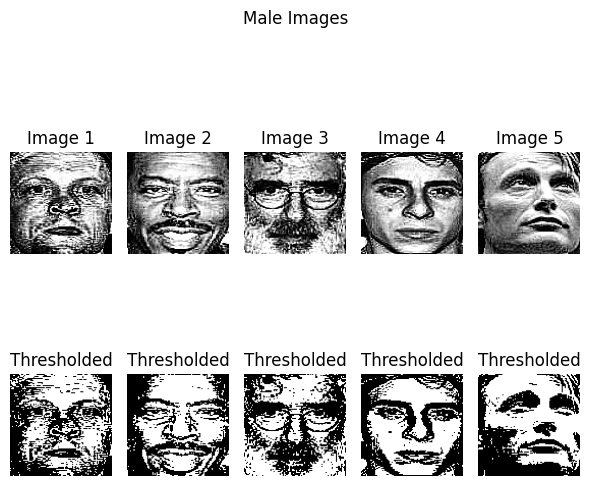

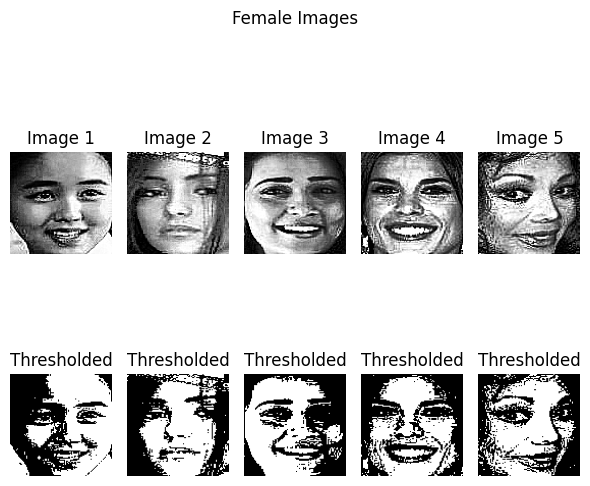

In [14]:
# Plot images with their box count
def plot_images_with_box_count(images, box_counts, title):
    num_images = len(images)
    plt.figure(figsize=(6, 6))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')

        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(cv2.threshold(images[i], 128, 255, cv2.THRESH_BINARY)[1], cmap='gray')
        plt.title(f"Thresholded")
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Display images with their box count and thresholded versions
plot_images_with_box_count(male_sharpened[:5], box_count_male[:5], "Male Images")
plot_images_with_box_count(female_sharpened[:5], box_count_female[:5], "Female Images")



In [15]:
# Printing box counting values for male images
print("Box Counting Values for Male Images:")
for idx, value in enumerate(box_count_male):
    print(f"Male Image {idx + 1}: {value}")

# Printing box counting values for female images
print("\nBox Counting Values for Female Images:")
for idx, value in enumerate(box_count_female):
    print(f"Female Image {idx + 1}: {value}")

Box Counting Values for Male Images:
Male Image 1: 268
Male Image 2: 169
Male Image 3: 268
Male Image 4: 161
Male Image 5: 126

Box Counting Values for Female Images:
Female Image 1: 113
Female Image 2: 145
Female Image 3: 79
Female Image 4: 169
Female Image 5: 208


In [16]:
#Appending the area values to the respective lists
male_area_values = []
for imagem in male_sharpened:
    area_value1 = extract_area(imagem)
    male_area_values.append(area_value1)

# Extract area for female_sharpened images
female_area_values = []
for imagef in female_sharpened:
    area_value2 = extract_area(imagef)
    female_area_values.append(area_value2)

In [17]:
male_area_values

[8606, 8827, 8605, 8760, 8957]

In [18]:
female_area_values

[9291, 9276, 9382, 9055, 8994]

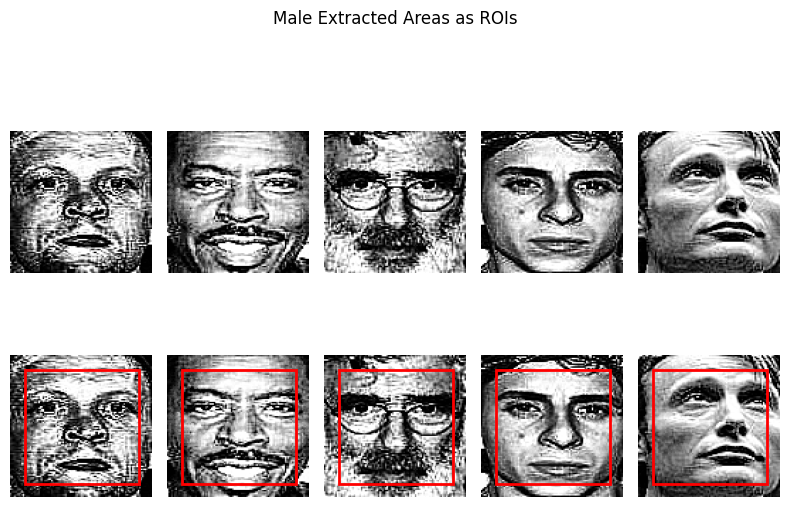

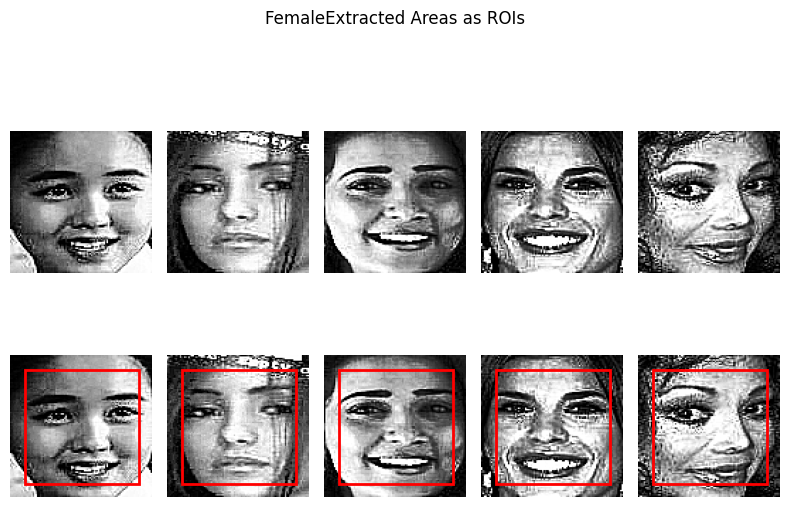

In [19]:

##Plotting images for RIO
def plot_images_with_roi(images, area_values, title):
    num_images = len(images)
    plt.figure(figsize=(8,6))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        height, width = images[i].shape
        rect = plt.Rectangle((10, 10), width - 20, height - 20, edgecolor='red', linewidth=2, fill=False)
        plt.gca().add_patch(rect)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
# Plot images with extracted areas as ROIs for both male and female
plot_images_with_roi(male_sharpened, male_area_values, "Male Extracted Areas as ROIs")
plot_images_with_roi(female_sharpened, female_area_values, "FemaleExtracted Areas as ROIs")


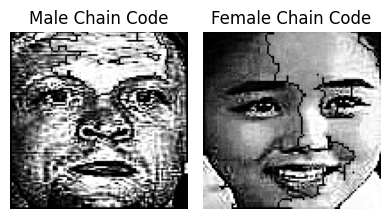

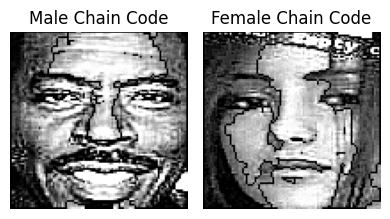

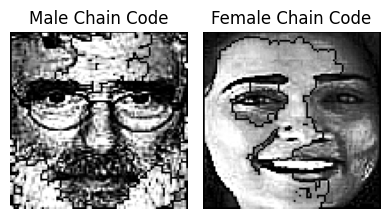

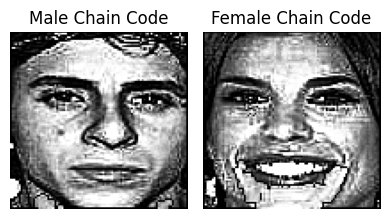

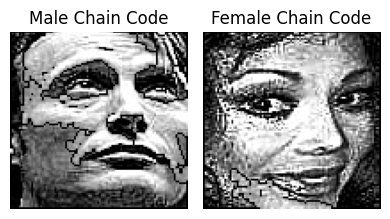

In [20]:
 # Function to extract Chain Code feature (Thresholding), invert the binary image, and apply morphological operations
def extract_chain_code(image):
    _, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    inverted_thresh = cv2.bitwise_not(thresh)  # Invert the binary image

    # Define a kernel
    kernel = np.ones((3, 3), np.uint8)

    # Apply morphological operations
    dilated = cv2.dilate(inverted_thresh, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    return eroded

# Function to overlay chain code contours on an image and display it
def overlay_chain_code(image, chain_code_image):
    contours, _ = cv2.findContours(chain_code_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image, contours, -1, (0, 255, 0), 1)  # Draw contours with black color on the image


# Chain code extraction for male images
chain_code_male_images = [extract_chain_code(np.array(image)) for image in male_sharpened]

# Chain code extraction for female images
chain_code_female_images = [extract_chain_code(np.array(image)) for image in female_sharpened]

# Overlay chain code contours on male sharpened images
for i in range(len(chain_code_male_images)):
    overlay_chain_code(male_sharpened[i], chain_code_male_images[i])

# Overlay chain code contours on female sharpened images
for i in range(len(chain_code_female_images)):
    overlay_chain_code(female_sharpened[i], chain_code_female_images[i])

# Display the images with chain code contours overlaid
num_images_to_display = 5
for i in range(num_images_to_display):
    plt.figure(figsize=(4, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(male_sharpened[i], cmap='gray')
    plt.title("Male Chain Code")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(female_sharpened[i], cmap='gray')
    plt.title("Female Chain Code")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [21]:
# Function to extract chain code values from chain code images
def extract_chain_code_values(chain_code_images):
    chain_code_values = []
    for chain_code_image in chain_code_images:
        contours, _ = cv2.findContours(chain_code_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        chain_code_image_values = []
        for contour in contours:
            chain_code_contour = []
            for i in range(1, len(contour)):
                dx = contour[i][0][0] - contour[i - 1][0][0]
                dy = contour[i][0][1] - contour[i - 1][0][1]
                code = (dx, dy)
                chain_code_contour.append(code)
            chain_code_image_values.append(chain_code_contour)
        chain_code_values.append(chain_code_image_values)
    return chain_code_values

# Extract chain code values for male and female chain code images
male_chain_code_values = extract_chain_code_values(chain_code_male_images)
female_chain_code_values = extract_chain_code_values(chain_code_female_images)

# Print chain code values for a few contours (e.g., first few contours)
num_contours_to_display = 5
for i in range(num_contours_to_display):
    print(f"Male Image {i+1} Chain Code Values:")
    print(male_chain_code_values[i])  # Print chain code values for male images
for i in range(num_contours_to_display):
    print(f"\nFemale Image {i+1} Chain Code Values:")
    print(female_chain_code_values[i])  # Print chain code values for female images

Male Image 1 Chain Code Values:
[[(1, 0), (1, 0), (-1, 0)], [(0, 1), (1, 1), (1, 0), (-1, 0), (-1, -1)], [(-1, 1), (-1, 1), (-1, 0), (-1, 0), (-1, 0), (-1, 0), (-1, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 1), (1, 0), (1, 0), (1, 0), (-1, 0), (-1, -1), (0, -1), (0, -1), (1, -1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (-1, 0), (-1, 0), (-1, 0), (-1, 0)], [(1, 0), (1, 0), (1, 0), (1, 0), (-1, 0), (-1, 0), (-1, 0)], [(1, 0), (1, 1), (0, 1), (1, 0), (1, 0), (1, 1), (1, 1), (1, 0), (1, -1), (0, -1), (1, -1), (-1, 0), (-1, 0), (-1, 0), (-1, 0), (-1, -1), (-1, 0), (-1, 0), (-1, 0)], [], [(1, 0), (1, 0), (1, 0), (-1, 0), (-1, 0)], [(1, 0), (1, 0), (1, 0), (1, 0), (-1, 0), (-1, 0), (-1, 0)], [(1, 0), (1, 1), (-1, -1)], [(1, 0), (1, 0), (-1, 0)], [(1, 0)], [(1, 0), (1, 0), (1, 0), (1, 0), (1, 1), (0, 1), (0, 1), (0, 1), (-1, 1), (-1, 0), (-1, 0), (-1, 0), (-1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (-1, 0), (-1, 0), (-1, -1), (0, -1), (0, -1), (0, -1), (1, -1), (1, 0

In [22]:
# Function to extract Local Binary Pattern (LBP) feature
def extract_lbp(image):
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp, bins=np.arange(0, n_points + 3), density=True)
    return lbp_hist
print("Male Image LBP Values:")
for i in range(len(male_sharpened)):
    lbp_values = extract_lbp(male_sharpened[i])
    print(f"Image {i+1} LBP values: {lbp_values}")

# Print LBP values for female images
print("\nFemale Image LBP Values:")
for i in range(len(female_sharpened)):
    lbp_values = extract_lbp(female_sharpened[i])
    print(f"Image {i+1} LBP values: {lbp_values}")

Male Image LBP Values:
Image 1 LBP values: [0.0608 0.0611 0.0229 0.0105 0.0049 0.0041 0.0019 0.0029 0.0026 0.0031
 0.0028 0.0028 0.0024 0.0038 0.0025 0.003  0.0019 0.0034 0.0032 0.0032
 0.0044 0.0065 0.0089 0.0183 0.211  0.5471]
Image 2 LBP values: [0.0556 0.0437 0.0305 0.0146 0.009  0.0071 0.006  0.0055 0.0054 0.0057
 0.0076 0.008  0.0085 0.01   0.0064 0.0059 0.0038 0.0037 0.004  0.005
 0.0051 0.0083 0.0145 0.0164 0.1898 0.5199]
Image 3 LBP values: [0.0652 0.0518 0.0264 0.0132 0.0088 0.0065 0.0029 0.0032 0.0036 0.0046
 0.0035 0.0045 0.0046 0.0052 0.0035 0.0039 0.003  0.0032 0.0024 0.0033
 0.0032 0.006  0.0111 0.0154 0.2246 0.5164]
Image 4 LBP values: [0.0528 0.0428 0.0205 0.0117 0.0063 0.0056 0.0059 0.0071 0.0066 0.0079
 0.0124 0.0144 0.0203 0.0181 0.0099 0.0085 0.007  0.006  0.0043 0.0063
 0.0066 0.0097 0.013  0.0187 0.1721 0.5055]
Image 5 LBP values: [0.0525 0.0425 0.0237 0.0154 0.0116 0.0099 0.0071 0.0085 0.0083 0.0083
 0.0137 0.0169 0.0189 0.0168 0.0088 0.0076 0.0057 0.0051 0.0041

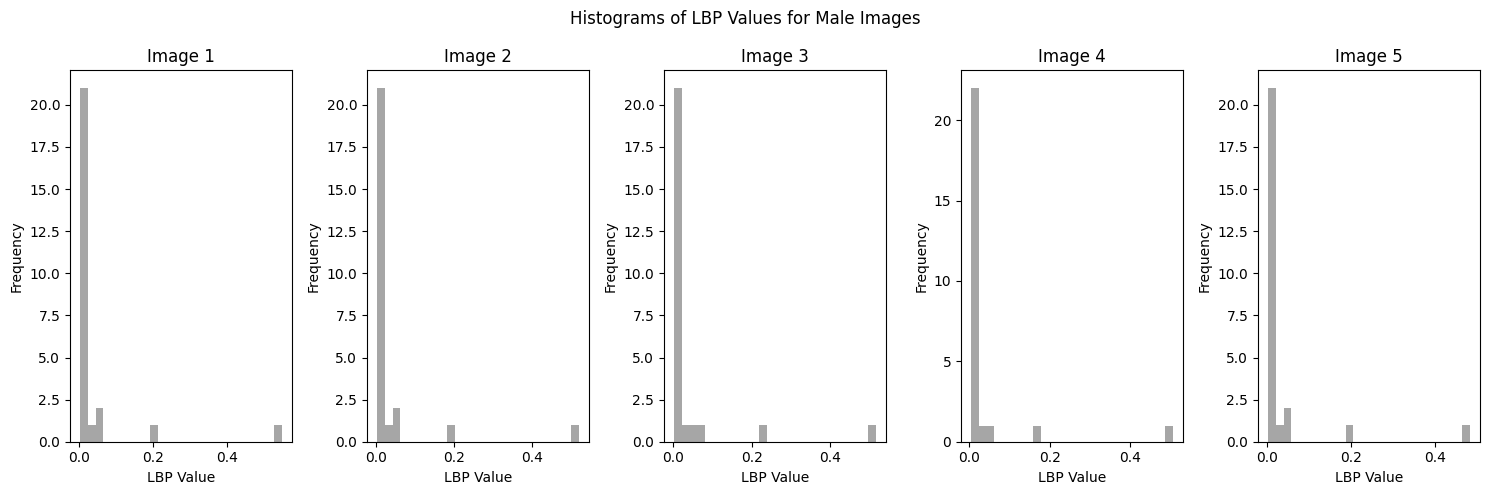

In [23]:
# Plot histograms for LBP values of male images
num_images = len(male_sharpened)
plt.figure(figsize=(15, 5))

for i in range(num_images):
    lbp_values = extract_lbp(male_sharpened[i])
    plt.subplot(1, num_images, i + 1)
    plt.hist(lbp_values, bins=len(lbp_values), color='gray', alpha=0.7)
    plt.title(f"Image {i+1}")
    plt.xlabel("LBP Value")
    plt.ylabel("Frequency")

plt.suptitle("Histograms of LBP Values for Male Images")
plt.tight_layout()
plt.show()

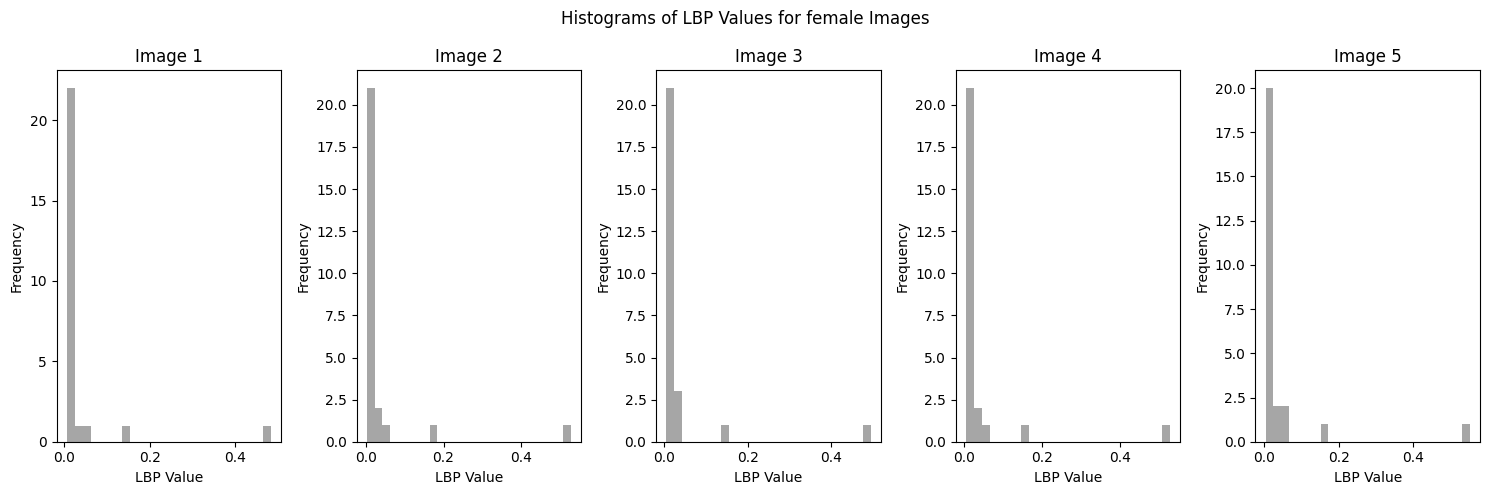

In [24]:
# Plot histograms for LBP values of female images
num_images = len(female_sharpened)
plt.figure(figsize=(15, 5))

for i in range(num_images):
    lbp_values = extract_lbp(female_sharpened[i])
    plt.subplot(1, num_images, i + 1)
    plt.hist(lbp_values, bins=len(lbp_values), color='gray', alpha=0.7)
    plt.title(f"Image {i+1}")
    plt.xlabel("LBP Value")
    plt.ylabel("Frequency")

plt.suptitle("Histograms of LBP Values for female Images")
plt.tight_layout()
plt.show()

In [25]:
 # Creating lists of feature values for males and females to create a data frame
male_features = {
    'Haralick_Contrast': [value['contrast'] for value in haralick_male_values],
    'Haralick_Homogeneity': [value['homogeneity'] for value in haralick_male_values],
    'Haralick_Energy': [value['energy'] for value in haralick_male_values],
    'Haralick_Correlation': [value['correlation'] for value in haralick_male_values],
    'Box_Counting_Values': box_count_male,
    'Area_Values': male_area_values,
    'LBP_Values': [extract_lbp(image) for image in male_sharpened],
    'Chain_Code_Values': male_chain_code_values
}

female_features = {
    'Haralick_Contrast': [value['contrast'] for value in haralick_female_values],
    'Haralick_Homogeneity': [value['homogeneity'] for value in haralick_female_values],
    'Haralick_Energy': [value['energy'] for value in haralick_female_values],
    'Haralick_Correlation': [value['correlation'] for value in haralick_female_values],
    'Box_Counting_Values': box_count_female,
    'Area_Values': female_area_values,
    'LBP_Values': [extract_lbp(image) for image in female_sharpened],
    'Chain_Code_Values': female_chain_code_values
}

# Creating DataFrames for males and females
male_df = pd.DataFrame(male_features)
female_df = pd.DataFrame(female_features)
# Add 'Gender' column to male_df and female_df
male_df['Gender'] = 'Male'
female_df['Gender'] = 'Female'
# Reorder columns to have 'Gender' as the first column
male_df = male_df[['Gender'] + [col for col in male_df.columns if col != 'Gender']]
female_df = female_df[['Gender'] + [col for col in female_df.columns if col != 'Gender']]

male_df


,Gender,Haralick_Contrast,Haralick_Homogeneity,Haralick_Energy,Haralick_Correlation,Box_Counting_Values,Area_Values,LBP_Values,Chain_Code_Values
0,Male,4034.849495,0.196894,0.122726,0.768381,268,8606,"[0.0608, 0.0611, 0.0229, 0.0105, 0.0049, 0.004...","[[(1, 0), (1, 0), (-1, 0)], [(0, 1), (1, 1), (..."
1,Male,2312.089192,0.181731,0.099928,0.850885,169,8827,"[0.0556, 0.0437, 0.0305, 0.0146, 0.009, 0.0071...","[[], [], [], [(1, 0), (1, 0), (-1, 0)], [], [(..."
2,Male,3983.521212,0.173836,0.108295,0.759076,268,8605,"[0.0652, 0.0518, 0.0264, 0.0132, 0.0088, 0.006...","[[], [], [(0, 1)], [], [(1, 0)], [(0, 1), (0, ..."
3,Male,2175.686061,0.166918,0.091632,0.859594,161,8760,"[0.0528, 0.0428, 0.0205, 0.0117, 0.0063, 0.005...","[[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, ..."
4,Male,1838.646970,0.163560,0.083060,0.869798,126,8957,"[0.0525, 0.0425, 0.0237, 0.0154, 0.0116, 0.009...","[[], [(-1, 1), (0, 1), (1, 1), (0, 1), (0, 1),..."


In [26]:
male_df.isnull().sum()

Gender                  0
Haralick_Contrast       0
Haralick_Homogeneity    0
Haralick_Energy         0
Haralick_Correlation    0
Box_Counting_Values     0
Area_Values             0
LBP_Values              0
Chain_Code_Values       0
dtype: int64

In [27]:
male_df=male_df.drop(["LBP_Values","Chain_Code_Values"], axis=1)


### Similarity Check with Correlation Coffecient

In [28]:
from scipy.stats import pearsonr
# Extracting the rows containing male features
male_data = male_df.iloc[:, 1:]  # Assuming the first column is an identifier

# Calculate Pearson correlation coefficient for each row with the first row (row 0)
threshold = 0.91  # Set your desired threshold here
similar_rows = []

for i in range(1, len(male_data)):
    correlation, _ = pearsonr(male_data.iloc[0], male_data.iloc[i])
    if correlation >= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")



Row 0 is similar to Rows 1, 2, 3, 4


In [29]:
from scipy.stats import pearsonr
# Extracting the rows containing male features
male_data = male_df.iloc[:, 1:]  # Assuming the first column is an identifier

# Calculate Pearson correlation coefficient for each row with the first row (row 0)
threshold = 0.95  # Set your desired threshold here
similar_rows = []

for i in range(1, len(male_data)):
    correlation, _ = pearsonr(male_data.iloc[0], male_data.iloc[i])
    if correlation >= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

Row 0 is similar to Rows 1, 2, 3, 4


In [30]:
from scipy.stats import pearsonr
# Extracting the rows containing male features
male_data = male_df.iloc[:, 1:]  # Assuming the first column is an identifier

# Calculate Pearson correlation coefficient for each row with the first row (row 0)
threshold = 0.99  # Set your desired threshold here
similar_rows = []

for i in range(1, len(male_data)):
    correlation, _ = pearsonr(male_data.iloc[0], male_data.iloc[i])
    if correlation >= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

Row 0 is similar to Rows 2


In [31]:
from scipy.stats import pearsonr
# Extracting the rows containing male features
male_data = male_df.iloc[:, 1:]  # Assuming the first column is an identifier

# Calculate Pearson correlation coefficient for each row with the first row (row 0)
threshold = 1  # Set your desired threshold here
similar_rows = []

for i in range(1, len(male_data)):
    correlation, _ = pearsonr(male_data.iloc[0], male_data.iloc[i])
    if correlation >= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

No similar rows found.


### Similarity Check with distance metrics

In [32]:
from scipy.spatial import distance
data_arrays = male_data.apply(lambda x: np.array(x)).values



# Convert the dataframe to arrays (excluding 'Gender' column)
data_arrays = male_df.drop('Gender', axis=1).values
threshold = 5000
similar_rows = []

# Compute Euclidean distance between rows
for i in range(1, len(data_arrays)):
    dist = distance.euclidean(data_arrays[0], data_arrays[i])
    if dist <= threshold:
        similar_rows.append(i)

if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

Row 0 is similar to Rows 1, 2, 3, 4


### Chi-Square

In [33]:
from scipy.stats import chi2_contingency

threshold = 0.05
similar_rows = []

for i in range(1, len(male_data)):
    chi2, _, _, _ = chi2_contingency([male_data.iloc[0], male_data.iloc[i]])
    if chi2 <= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

No similar rows found.


In [34]:
threshold = 0.5
similar_rows = []

for i in range(1, len(male_data)):
    chi2, _, _, _ = chi2_contingency([male_data.iloc[0], male_data.iloc[i]])
    if chi2 <= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

Row 0 is similar to Rows 2


In [35]:
threshold = 1000
similar_rows = []

for i in range(1, len(male_data)):
    chi2, _, _, _ = chi2_contingency([male_data.iloc[0], male_data.iloc[i]])
    if chi2 <= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

Row 0 is similar to Rows 1, 2, 3, 4


In [36]:
female_df

,Gender,Haralick_Contrast,Haralick_Homogeneity,Haralick_Energy,Haralick_Correlation,Box_Counting_Values,Area_Values,LBP_Values,Chain_Code_Values
0,Female,1360.080505,0.153852,0.051972,0.897294,113,9291,"[0.0542, 0.0396, 0.0213, 0.0123, 0.01, 0.0096,...","[[(-1, 1), (0, 1), (-1, 1), (-1, 0), (1, 0), (..."
1,Female,1572.307172,0.136395,0.054128,0.880509,145,9276,"[0.0519, 0.0418, 0.0266, 0.0134, 0.0104, 0.007...","[[(1, 1), (1, 0), (1, 1), (1, 0), (1, 0), (1, ..."
2,Female,1117.535253,0.147987,0.052652,0.918772,79,9382,"[0.0422, 0.0385, 0.0213, 0.0152, 0.0127, 0.008...","[[], [], [], [(1, 0), (1, 0), (1, 0), (1, 1), ..."
3,Female,2481.296263,0.143295,0.073946,0.832857,169,9055,"[0.0523, 0.0424, 0.0256, 0.011, 0.0087, 0.0063...","[[(0, 1), (0, 1), (0, 1), (0, -1), (0, -1)], [..."
4,Female,2947.629293,0.133257,0.070236,0.806927,208,8994,"[0.062, 0.0507, 0.0259, 0.0125, 0.0065, 0.0045...","[[], [(0, 1), (0, 1), (0, 1), (0, -1), (0, -1)..."


In [37]:
female_df.isnull().sum()

Gender                  0
Haralick_Contrast       0
Haralick_Homogeneity    0
Haralick_Energy         0
Haralick_Correlation    0
Box_Counting_Values     0
Area_Values             0
LBP_Values              0
Chain_Code_Values       0
dtype: int64

In [38]:
female_df=female_df.drop(["LBP_Values","Chain_Code_Values"], axis=1)

### Correlation

In [39]:
from scipy.stats import pearsonr

female_data = female_df.iloc[:, 1:]  # Assuming the first column is an identifier

# Calculate Pearson correlation coefficient for each row with the first row (row 0)
threshold = 0.91
similar_rows = []

for i in range(1, len(female_data)):
    correlation, _ = pearsonr(female_data.iloc[0], female_data.iloc[i])
    if correlation >= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")



Row 0 is similar to Rows 1, 2, 3, 4


In [40]:

threshold = 0.95
similar_rows = []

for i in range(1, len(female_data)):
    correlation, _ = pearsonr(female_data.iloc[0], female_data.iloc[i])
    if correlation >= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

Row 0 is similar to Rows 1, 2, 3, 4


In [41]:


threshold = 0.99
similar_rows = []

for i in range(1, len(female_data)):
    correlation, _ = pearsonr(female_data.iloc[0], female_data.iloc[i])
    if correlation >= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

Row 0 is similar to Rows 1, 2, 3


In [42]:


threshold = 1
similar_rows = []

for i in range(1, len(female_data)):
    correlation, _ = pearsonr(female_data.iloc[0], female_data.iloc[i])
    if correlation >= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

No similar rows found.


### Chi-Square

In [43]:
from scipy.stats import chi2_contingency

threshold = 0.05
similar_rows = []

for i in range(1, len(female_data)):
    chi2, _, _, _ = chi2_contingency([female_data.iloc[0], female_data.iloc[i]])
    if chi2 <= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

No similar rows found.


In [44]:
threshold = 0.5

for i in range(1, len(female_data)):
    chi2, _, _, _ = chi2_contingency([female_data.iloc[0], female_data.iloc[i]])
    if chi2 <= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

No similar rows found.


In [45]:
threshold = 1000
similar_rows = []

for i in range(1, len(female_data)):
    chi2, _, _, _ = chi2_contingency([female_data.iloc[0], female_data.iloc[i]])
    if chi2 <= threshold:
        similar_rows.append(i)

# Print similar rows
if similar_rows:
    print(f"Row 0 is similar to Rows {', '.join(str(x) for x in similar_rows)}")
else:
    print("No similar rows found.")

Row 0 is similar to Rows 1, 2, 3, 4


### Apply 2 more features
1. GABOR
2. PCA

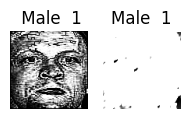

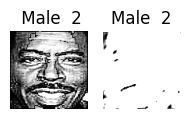

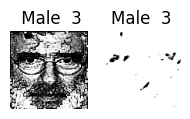

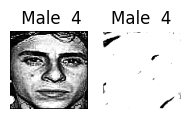

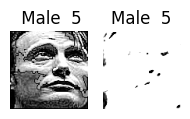

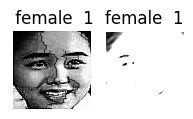

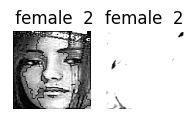

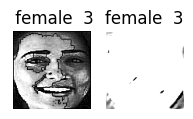

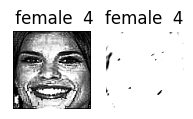

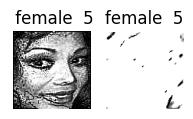

In [46]:
def apply_gabor_filter(image):
    # Define the parameters for the Gabor filter
    ksize = 9
    sigma = 4
    theta = np.pi / 4
    lambd = 10.0
    gamma = 0.5
    psi = 0

    # Create and apply the Gabor filter
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)  # Applying the Gabor filter

    return filtered_image

# Apply Gabor filter to male_sharpened images
male_gabor_filtered = [apply_gabor_filter(image) for image in male_sharpened]
female_gabor_filtered = [apply_gabor_filter(image) for image in female_sharpened]

# Display original and Gabor filtered images
num_images_to_display = 5
for i in range(num_images_to_display):
    plt.figure(figsize=(2, 2))

    plt.subplot(1, 2, 1)
    plt.imshow(male_sharpened[i], cmap='gray')
    plt.title(f" Male  {i+1}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(male_gabor_filtered[i], cmap='gray')
    plt.title(f"Male  {i+1}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
# Display original and Gabor filtered images
num_images_to_display = 5
for i in range(num_images_to_display):
    plt.figure(figsize=(2, 2))

    plt.subplot(1, 2, 1)
    plt.imshow(female_sharpened[i], cmap='gray')
    plt.title(f" female  {i+1}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(female_gabor_filtered[i], cmap='gray')
    plt.title(f"female  {i+1}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [47]:
# Function to extract pixel values as a list for a given image
def extract_pixel_values(image):
    pixel_values = image.flatten().tolist()  # Flatten the image matrix and convert to a list
    return pixel_values

# Apply Gabor filter to male_sharpened images
male_gabor_filtered = [apply_gabor_filter(image) for image in male_sharpened]
female_gabor_filtered = [apply_gabor_filter(image) for image in female_sharpened]

# Create dictionaries for feature values for males and females
male_features_gabor = {
    f'Male_Gabor_Pixel_Values_{i+1}': [extract_pixel_values(image) for image in male_gabor_filtered]
    for i in range(len(male_gabor_filtered))
}
female_features_gabor = {
    f'Female_Gabor_Pixel_Values_{i+1}': [extract_pixel_values(image) for image in female_gabor_filtered]
    for i in range(len(female_gabor_filtered))
}

# Update existing male and female feature dictionaries with Gabor filtered pixel values
male_features.update(male_features_gabor)
female_features.update(female_features_gabor)

# Creating DataFrames for males and females
male_df = pd.DataFrame(male_features)
female_df = pd.DataFrame(female_features)



In [48]:
male_df

,Haralick_Contrast,Haralick_Homogeneity,Haralick_Energy,Haralick_Correlation,Box_Counting_Values,Area_Values,LBP_Values,Chain_Code_Values,Male_Gabor_Pixel_Values_1,Male_Gabor_Pixel_Values_2,Male_Gabor_Pixel_Values_3,Male_Gabor_Pixel_Values_4,Male_Gabor_Pixel_Values_5
0,4034.849495,0.196894,0.122726,0.768381,268,8606,"[0.0608, 0.0611, 0.0229, 0.0105, 0.0049, 0.004...","[[(1, 0), (1, 0), (-1, 0)], [(0, 1), (1, 1), (...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ..."
1,2312.089192,0.181731,0.099928,0.850885,169,8827,"[0.0556, 0.0437, 0.0305, 0.0146, 0.009, 0.0071...","[[], [], [], [(1, 0), (1, 0), (-1, 0)], [], [(...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25..."
2,3983.521212,0.173836,0.108295,0.759076,268,8605,"[0.0652, 0.0518, 0.0264, 0.0132, 0.0088, 0.006...","[[], [], [(0, 1)], [], [(1, 0)], [(0, 1), (0, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ..."
3,2175.686061,0.166918,0.091632,0.859594,161,8760,"[0.0528, 0.0428, 0.0205, 0.0117, 0.0063, 0.005...","[[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, ...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128..."
4,1838.646970,0.163560,0.083060,0.869798,126,8957,"[0.0525, 0.0425, 0.0237, 0.0154, 0.0116, 0.009...","[[], [(-1, 1), (0, 1), (1, 1), (0, 1), (0, 1),...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."


In [49]:
female_df

,Haralick_Contrast,Haralick_Homogeneity,Haralick_Energy,Haralick_Correlation,Box_Counting_Values,Area_Values,LBP_Values,Chain_Code_Values,Female_Gabor_Pixel_Values_1,Female_Gabor_Pixel_Values_2,Female_Gabor_Pixel_Values_3,Female_Gabor_Pixel_Values_4,Female_Gabor_Pixel_Values_5
0,1360.080505,0.153852,0.051972,0.897294,113,9291,"[0.0542, 0.0396, 0.0213, 0.0123, 0.01, 0.0096,...","[[(-1, 1), (0, 1), (-1, 1), (-1, 0), (1, 0), (...","[25, 26, 29, 34, 37, 35, 37, 33, 35, 43, 55, 7...","[25, 26, 29, 34, 37, 35, 37, 33, 35, 43, 55, 7...","[25, 26, 29, 34, 37, 35, 37, 33, 35, 43, 55, 7...","[25, 26, 29, 34, 37, 35, 37, 33, 35, 43, 55, 7...","[25, 26, 29, 34, 37, 35, 37, 33, 35, 43, 55, 7..."
1,1572.307172,0.136395,0.054128,0.880509,145,9276,"[0.0519, 0.0418, 0.0266, 0.0134, 0.0104, 0.007...","[[(1, 1), (1, 0), (1, 1), (1, 0), (1, 0), (1, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
2,1117.535253,0.147987,0.052652,0.918772,79,9382,"[0.0422, 0.0385, 0.0213, 0.0152, 0.0127, 0.008...","[[], [], [], [(1, 0), (1, 0), (1, 0), (1, 1), ...","[225, 222, 226, 225, 247, 242, 227, 206, 210, ...","[225, 222, 226, 225, 247, 242, 227, 206, 210, ...","[225, 222, 226, 225, 247, 242, 227, 206, 210, ...","[225, 222, 226, 225, 247, 242, 227, 206, 210, ...","[225, 222, 226, 225, 247, 242, 227, 206, 210, ..."
3,2481.296263,0.143295,0.073946,0.832857,169,9055,"[0.0523, 0.0424, 0.0256, 0.011, 0.0087, 0.0063...","[[(0, 1), (0, 1), (0, 1), (0, -1), (0, -1)], [...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
4,2947.629293,0.133257,0.070236,0.806927,208,8994,"[0.062, 0.0507, 0.0259, 0.0125, 0.0065, 0.0045...","[[], [(0, 1), (0, 1), (0, 1), (0, -1), (0, -1)...","[255, 255, 244, 188, 149, 127, 136, 157, 186, ...","[255, 255, 244, 188, 149, 127, 136, 157, 186, ...","[255, 255, 244, 188, 149, 127, 136, 157, 186, ...","[255, 255, 244, 188, 149, 127, 136, 157, 186, ...","[255, 255, 244, 188, 149, 127, 136, 157, 186, ..."


In [50]:
from sklearn.decomposition import PCA

In [51]:
# Function to apply PCA and return transformed images
def apply_pca(images):
    # Reshape images for PCA (assuming they are grayscale)
    reshaped_images = [image.reshape(-1) for image in images]

    # Initialize PCA
    pca = PCA(n_components=len(images))  # You can adjust the number of components as needed

    # Fit and transform the images
    transformed_images = pca.fit_transform(reshaped_images)

    # Inverse transform to reconstruct images from transformed data
    reconstructed_images = pca.inverse_transform(transformed_images)

    return transformed_images, reconstructed_images, pca.components_

# Apply PCA to male_sharpened images
male_transformed_images, male_reconstructed_images, male_pca_components = apply_pca(male_sharpened)

# Apply PCA to female_sharpened images
female_transformed_images, female_reconstructed_images, female_pca_components = apply_pca(female_sharpened)

# Print transformed images for males
print("Transformed Images for Males:")
for i, image in enumerate(male_transformed_images):
    print(f"Image {i + 1} - Transformed Values: {image}")

# Print transformed images for females
print("\nTransformed Images for Females:")
for i, image in enumerate(female_transformed_images):
    print(f"Image {i + 1} - Transformed Values: {image}")

Transformed Images for Males:
Image 1 - Transformed Values: [-3.41003199e+03 -3.84031191e+03 -4.89872177e+03 -1.66046846e+03
  2.44999530e-12]
Image 2 - Transformed Values: [-2.01860698e+03  6.12583677e+02  6.07860477e+02  6.28077781e+03
  2.44999530e-12]
Image 3 - Transformed Values: [ 8.19002341e+03 -3.64009948e+02 -1.22320292e+03  5.27395010e+01
  2.44999530e-12]
Image 4 - Transformed Values: [-1.00270469e+03 -3.38774879e+03  5.60569700e+03 -2.16166229e+03
  2.44999530e-12]
Image 5 - Transformed Values: [-1.75867975e+03  6.97948696e+03 -9.16327783e+01 -2.51138657e+03
  2.44999530e-12]

Transformed Images for Females:
Image 1 - Transformed Values: [7.63262172e+03 3.34708167e+03 1.05123081e+02 3.83509980e+02
 2.11030588e-12]
Image 2 - Transformed Values: [ 1.29391428e+03 -4.45219382e+03 -1.51947379e+03 -4.03004876e+03
  2.11030588e-12]
Image 3 - Transformed Values: [-5.64016238e+03  4.49466163e+03 -9.29661705e+02 -2.05250355e+03
  2.11030588e-12]
Image 4 - Transformed Values: [-1.6190

In [52]:
# Create DataFrames for PCA values of males and females
male_pca_df = pd.DataFrame(male_transformed_images, columns=[f'Male_PCA_{i+1}' for i in range(len(male_transformed_images[0]))])
female_pca_df = pd.DataFrame(female_transformed_images, columns=[f'Female_PCA_{i+1}' for i in range(len(female_transformed_images[0]))])
# Concatenate PCA DataFrames with combined_df1
combined_male_with_pca = pd.concat([male_df, male_pca_df], axis=1)
combined_female_with_pca = pd.concat([female_df,female_pca_df], axis=1)



In [53]:
combined_male_with_pca1= combined_male_with_pca.drop(["LBP_Values", "Chain_Code_Values"], axis=1)
combined_male_with_pca1

,Haralick_Contrast,Haralick_Homogeneity,Haralick_Energy,Haralick_Correlation,Box_Counting_Values,Area_Values,Male_Gabor_Pixel_Values_1,Male_Gabor_Pixel_Values_2,Male_Gabor_Pixel_Values_3,Male_Gabor_Pixel_Values_4,Male_Gabor_Pixel_Values_5,Male_PCA_1,Male_PCA_2,Male_PCA_3,Male_PCA_4,Male_PCA_5
0,4034.849495,0.196894,0.122726,0.768381,268,8606,"[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...",-3410.031991,-3840.311905,-4898.721772,-1660.468456,2.449995e-12
1,2312.089192,0.181731,0.099928,0.850885,169,8827,"[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...",-2018.606979,612.583677,607.860477,6280.777813,2.449995e-12
2,3983.521212,0.173836,0.108295,0.759076,268,8605,"[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...",8190.023413,-364.009948,-1223.202923,52.739501,2.449995e-12
3,2175.686061,0.166918,0.091632,0.859594,161,8760,"[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...",-1002.704694,-3387.748787,5605.696996,-2161.662287,2.449995e-12
4,1838.646970,0.163560,0.083060,0.869798,126,8957,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",-1758.679749,6979.486963,-91.632778,-2511.386572,2.449995e-12


In [54]:
combined_female_with_pca1= combined_female_with_pca.drop(["LBP_Values", "Chain_Code_Values"], axis=1)
combined_female_with_pca1

,Haralick_Contrast,Haralick_Homogeneity,Haralick_Energy,Haralick_Correlation,Box_Counting_Values,Area_Values,Female_Gabor_Pixel_Values_1,Female_Gabor_Pixel_Values_2,Female_Gabor_Pixel_Values_3,Female_Gabor_Pixel_Values_4,Female_Gabor_Pixel_Values_5,Female_PCA_1,Female_PCA_2,Female_PCA_3,Female_PCA_4,Female_PCA_5
0,1360.080505,0.153852,0.051972,0.897294,113,9291,"[25, 26, 29, 34, 37, 35, 37, 33, 35, 43, 55, 7...","[25, 26, 29, 34, 37, 35, 37, 33, 35, 43, 55, 7...","[25, 26, 29, 34, 37, 35, 37, 33, 35, 43, 55, 7...","[25, 26, 29, 34, 37, 35, 37, 33, 35, 43, 55, 7...","[25, 26, 29, 34, 37, 35, 37, 33, 35, 43, 55, 7...",7632.621719,3347.081673,105.123081,383.509980,2.110306e-12
1,1572.307172,0.136395,0.054128,0.880509,145,9276,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",1293.914279,-4452.193821,-1519.473788,-4030.048762,2.110306e-12
2,1117.535253,0.147987,0.052652,0.918772,79,9382,"[225, 222, 226, 225, 247, 242, 227, 206, 210, ...","[225, 222, 226, 225, 247, 242, 227, 206, 210, ...","[225, 222, 226, 225, 247, 242, 227, 206, 210, ...","[225, 222, 226, 225, 247, 242, 227, 206, 210, ...","[225, 222, 226, 225, 247, 242, 227, 206, 210, ...",-5640.162380,4494.661634,-929.661705,-2052.503553,2.110306e-12
3,2481.296263,0.143295,0.073946,0.832857,169,9055,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",-1619.028699,-1804.316812,-3548.739389,4411.913786,2.110306e-12
4,2947.629293,0.133257,0.070236,0.806927,208,8994,"[255, 255, 244, 188, 149, 127, 136, 157, 186, ...","[255, 255, 244, 188, 149, 127, 136, 157, 186, ...","[255, 255, 244, 188, 149, 127, 136, 157, 186, ...","[255, 255, 244, 188, 149, 127, 136, 157, 186, ...","[255, 255, 244, 188, 149, 127, 136, 157, 186, ...",-1667.344919,-1585.232674,5892.751801,1287.128549,2.110306e-12


### Correlation Cofficient

In [55]:
from scipy.stats import pearsonr

# Assuming 'numeric_data' contains your DataFrame
columns_to_exclude = ["Male_Gabor_Pixel_Values_1",	"Male_Gabor_Pixel_Values_2","Male_Gabor_Pixel_Values_3",	"Male_Gabor_Pixel_Values_4",	"Male_Gabor_Pixel_Values_5"]
numeric_data_subset = combined_male_with_pca1.drop(columns=columns_to_exclude)
numeric_data_subset = numeric_data_subset.apply(pd.to_numeric, errors='coerce')
# Fill NaN or infinite values
numeric_data_subset = numeric_data_subset.replace([np.inf, -np.inf], np.nan).fillna(0)

# Calculate correlation coefficients for each row with the first row
correlation_stats = []
for i in range(1, len(numeric_data_subset)):
    correlation, _ = pearsonr(numeric_data_subset.iloc[0], numeric_data_subset.iloc[i])
    correlation_stats.append(correlation)
    if correlation >= 0.30:
        print(f"Row 0 is similar to Row {i}")
    else:
        print(f"Row 0 is dissimilar to Row {i}")

Row 0 is similar to Row 1
Row 0 is similar to Row 2
Row 0 is similar to Row 3
Row 0 is similar to Row 4


In [56]:
# Calculate correlation coefficients for each row with the first row
correlation_stats = []
for i in range(1, len(numeric_data_subset)):
    correlation, _ = pearsonr(numeric_data_subset.iloc[0], numeric_data_subset.iloc[i])
    correlation_stats.append(correlation)
    if correlation >= 0.450:
        print(f"Row 0 is similar to Row {i}")
    else:
        print(f"Row 0 is dissimilar to Row {i}")

Row 0 is similar to Row 1
Row 0 is similar to Row 2
Row 0 is similar to Row 3
Row 0 is similar to Row 4


In [57]:
from scipy.stats import pearsonr

# Assuming 'numeric_data' contains your DataFrame
columns_to_exclude = ["Female_Gabor_Pixel_Values_1",	"Female_Gabor_Pixel_Values_2","Female_Gabor_Pixel_Values_3",	"Female_Gabor_Pixel_Values_4",	"Female_Gabor_Pixel_Values_5"]
numeric_data_subset1 = combined_female_with_pca1.drop(columns=columns_to_exclude)
numeric_data_subset1 = numeric_data_subset1.apply(pd.to_numeric, errors='coerce')
# Fill NaN or infinite values
numeric_data_subset1 = numeric_data_subset1.replace([np.inf, -np.inf], np.nan).fillna(0)

# Calculate correlation coefficients for each row with the first row
correlation_stats1 = []
for i in range(1, len(numeric_data_subset1)):
    correlation, _ = pearsonr(numeric_data_subset1.iloc[0], numeric_data_subset1.iloc[i])
    correlation_stats1.append(correlation)
    if correlation >= 0.30:
        print(f"Row 0 is similar to Row {i}")
    else:
        print(f"Row 0 is dissimilar to Row {i}")

Row 0 is similar to Row 1
Row 0 is similar to Row 2
Row 0 is similar to Row 3
Row 0 is similar to Row 4


In [58]:
# Calculate correlation coefficients for each row with the first row
correlation_stats1 = []
for i in range(1, len(numeric_data_subset1)):
    correlation, _ = pearsonr(numeric_data_subset1.iloc[0], numeric_data_subset1.iloc[i])
    correlation_stats1.append(correlation)
    if correlation >= 0.450:
        print(f"Row 0 is similar to Row {i}")
    else:
        print(f"Row 0 is dissimilar to Row {i}")

Row 0 is similar to Row 1
Row 0 is dissimilar to Row 2
Row 0 is dissimilar to Row 3
Row 0 is dissimilar to Row 4


In [59]:
combined_male_with_pca1

,Haralick_Contrast,Haralick_Homogeneity,Haralick_Energy,Haralick_Correlation,Box_Counting_Values,Area_Values,Male_Gabor_Pixel_Values_1,Male_Gabor_Pixel_Values_2,Male_Gabor_Pixel_Values_3,Male_Gabor_Pixel_Values_4,Male_Gabor_Pixel_Values_5,Male_PCA_1,Male_PCA_2,Male_PCA_3,Male_PCA_4,Male_PCA_5
0,4034.849495,0.196894,0.122726,0.768381,268,8606,"[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...","[223, 255, 255, 255, 255, 255, 255, 255, 255, ...",-3410.031991,-3840.311905,-4898.721772,-1660.468456,2.449995e-12
1,2312.089192,0.181731,0.099928,0.850885,169,8827,"[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...","[70, 76, 108, 139, 166, 236, 255, 255, 255, 25...",-2018.606979,612.583677,607.860477,6280.777813,2.449995e-12
2,3983.521212,0.173836,0.108295,0.759076,268,8605,"[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...","[255, 255, 255, 255, 255, 255, 248, 138, 162, ...",8190.023413,-364.009948,-1223.202923,52.739501,2.449995e-12
3,2175.686061,0.166918,0.091632,0.859594,161,8760,"[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...","[58, 58, 90, 142, 176, 194, 167, 131, 110, 128...",-1002.704694,-3387.748787,5605.696996,-2161.662287,2.449995e-12
4,1838.646970,0.163560,0.083060,0.869798,126,8957,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...",-1758.679749,6979.486963,-91.632778,-2511.386572,2.449995e-12


In [60]:
from scipy.stats import pearsonr

# Assuming 'numeric_data' contains your DataFrame
columns_to_exclude = ["Haralick_Contrast",	"Haralick_Homogeneity",	"Haralick_Energy",	"Haralick_Correlation",	"Box_Counting_Values",	"Area_Values","Male_Gabor_Pixel_Values_1",	"Male_Gabor_Pixel_Values_2","Male_Gabor_Pixel_Values_3",	"Male_Gabor_Pixel_Values_4",	"Male_Gabor_Pixel_Values_5"]
numeric_data_subset = combined_male_with_pca1.drop(columns=columns_to_exclude)
numeric_data_subset = numeric_data_subset.apply(pd.to_numeric, errors='coerce')
# Fill NaN or infinite values
numeric_data_subset = numeric_data_subset.replace([np.inf, -np.inf], np.nan).fillna(0)
# Calculate correlation coefficients for each row with the first row
correlation_stats = []
for i in range(1, len(numeric_data_subset)):
    correlation, _ = pearsonr(numeric_data_subset.iloc[0], numeric_data_subset.iloc[i])
    correlation_stats.append(correlation)
    if correlation >= 0.2:
        print(f"Row 0 is similar to Row {i}")
    else:
        print(f"Row 0 is dissimilar to Row {i}")

Row 0 is similar to Row 1
Row 0 is dissimilar to Row 2
Row 0 is dissimilar to Row 3
Row 0 is dissimilar to Row 4


In [61]:
# Calculate correlation coefficients for each row with the first row
correlation_stats = []
for i in range(1, len(numeric_data_subset)):
    correlation, _ = pearsonr(numeric_data_subset.iloc[0], numeric_data_subset.iloc[i])
    correlation_stats.append(correlation)

    # Determine similarity or dissimilarity based on correlation coefficient
    if correlation >= 0.450:  # Define a threshold for similarity
        print(f"Row 0 is similar to Row {i}")
    else:
        print(f"Row 0 is dissimilar to Row {i}")

Row 0 is dissimilar to Row 1
Row 0 is dissimilar to Row 2
Row 0 is dissimilar to Row 3
Row 0 is dissimilar to Row 4


In [62]:
# Conclusion and Analysis are in the power point slides or pdf slides